In [ ]:
!pip install -q kaggle
from google.colab import files
import time
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anthienvu","key":"97a7bfb5148d6eada7d255b2001e47f4"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023     Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          12195        409  1.0              
nelgiriyewithana/top-spotify-songs-2023             Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           1941         76  1.0              
iamsouravbanerjee/airline-dataset                   Airline Dataset                                  4MB  2023-08-30 12:03:12            803         27  1.0              
kacperrabczewski/every-porsche-911                  Every Porsche 911 since 1964                    21KB  2023-08-30 21:24:31            523     

In [ ]:
!kaggle datasets download -d xhlulu/leafsnap-dataset

100% 840M/840M [00:10<00:00, 107MB/s]
100% 840M/840M [00:10<00:00, 87.7MB/s]


In [ ]:
!unzip leafsnap-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-4.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-1.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-4.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-1.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-4.png  
  inflating: l

In [ ]:
!pip install wget
!python -m wget https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    ./tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=11a28f4de03d1ae3ff2e106627d60577a65f7e72788b41472683e2857681b780
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget

Saved under inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weight_file = "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model = InceptionV3(input_shape=(224, 224, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weight_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer("mixed7")
print("last layer output shape: ", last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

train_generator = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/leafsnap-dataset/dataset/images/field',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="training",
                                                 class_mode='categorical')

validation_generator = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/leafsnap-dataset/dataset/images/field',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 6238 images belonging to 184 classes.
Found 1481 images belonging to 184 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(.2)(x)
x = layers.Dense(184, kernel_regularizer=regularizers.l2(0.01), activation = 'softmax')(x)

model = Model(pre_trained_model.input, x)

# model.summary()

model.compile(optimizer = Adam(learning_rate=.0001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# history = model.fit_generator(training_datagen.flow(x_train,y_train, batch_size=32),
#                               epochs = 50, validation_data = validation_datagen.flow(x_test, y_test, batch_size=32),
#                               verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

epochs=25
batch_size=256

# Start the timer
start_time = time.time()

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

# Calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
# Print the training time
print(f"Training time: {elapsed_time} seconds")

Epoch 1/25
48/48 [==============================] - 24s 402ms/step - loss: 7.2468 - accuracy: 0.1832 - val_loss: 6.2316 - val_accuracy: 0.2955
Epoch 2/25
48/48 [==============================] - 17s 364ms/step - loss: 5.2261 - accuracy: 0.4616 - val_loss: 4.9529 - val_accuracy: 0.5000
Epoch 3/25
48/48 [==============================] - 17s 363ms/step - loss: 4.0988 - accuracy: 0.6310 - val_loss: 4.5161 - val_accuracy: 0.5369
Epoch 4/25
48/48 [==============================] - 16s 333ms/step - loss: 3.3070 - accuracy: 0.7340 - val_loss: 3.8633 - val_accuracy: 0.6193
Epoch 5/25
48/48 [==============================] - 16s 320ms/step - loss: 2.9125 - accuracy: 0.7878 - val_loss: 3.5529 - val_accuracy: 0.6108
Epoch 6/25
48/48 [==============================] - 15s 322ms/step - loss: 2.4881 - accuracy: 0.8464 - val_loss: 3.4290 - val_accuracy: 0.6080
Epoch 7/25
48/48 [==============================] - 16s 329ms/step - loss: 2.2703 - accuracy: 0.8607 - val_loss: 3.0266 - val_accuracy: 0.6847

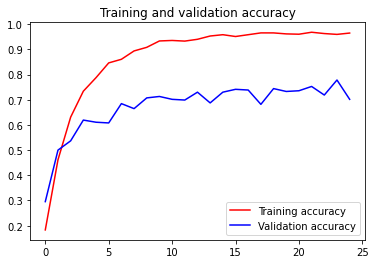

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - InceptionV3')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers

# Create a base model (InceptionV3) without top (classification) layers
base_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Add custom top layers for your specific task
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(184, activation='softmax')(x)

# Create the final model
inception_model = models.Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
inception_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Set the number of epochs and batch size
epochs = 25
batch_size = 256

# Start the timer
start_time = time.time()

# Train the model using your data generators (train_generator and validation_generator)
inception_history = inception_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)

# Calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
# Print the training time
print(f"Training time: {elapsed_time} seconds")

Epoch 1/25
24/24 [==============================] - 49s 327ms/step - loss: 4.9552 - accuracy: 0.0469 - val_loss: 4.8179 - val_accuracy: 0.0500
Epoch 2/25
24/24 [==============================] - 7s 295ms/step - loss: 4.2272 - accuracy: 0.1979 - val_loss: 4.3350 - val_accuracy: 0.1063
Epoch 3/25
24/24 [==============================] - 7s 272ms/step - loss: 3.4478 - accuracy: 0.3512 - val_loss: 3.7101 - val_accuracy: 0.1750
Epoch 4/25
24/24 [==============================] - 7s 266ms/step - loss: 2.6376 - accuracy: 0.4818 - val_loss: 3.0147 - val_accuracy: 0.3187
Epoch 5/25
24/24 [==============================] - 7s 270ms/step - loss: 1.9298 - accuracy: 0.6201 - val_loss: 2.4844 - val_accuracy: 0.3938
Epoch 6/25
24/24 [==============================] - 7s 273ms/step - loss: 1.5527 - accuracy: 0.6562 - val_loss: 1.9112 - val_accuracy: 0.5813
Epoch 7/25
24/24 [==============================] - 7s 269ms/step - loss: 1.2471 - accuracy: 0.7135 - val_loss: 1.8235 - val_accuracy: 0.5625
Epoch

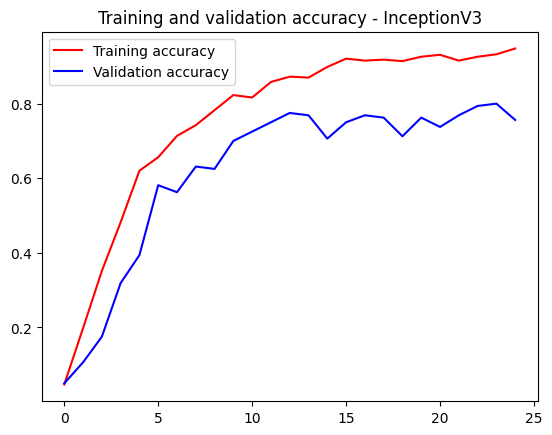

<Figure size 640x480 with 0 Axes>

Accuracy of the last epoch: 0.9479


In [ ]:
import matplotlib.pyplot as plt
acc = inception_history.history['accuracy']
val_acc = inception_history.history['val_accuracy']
loss = inception_history.history['loss']
val_loss = inception_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - InceptionV3')
plt.legend(loc=0)
plt.figure()

plt.show()

# Access the training history to print the accuracy of the last epoch
last_epoch_accuracy = inception_history.history['accuracy'][-1]
print(f'Accuracy of the last epoch: {last_epoch_accuracy:.4f}')

# Transer Learning with MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model = MobileNetV2(input_shape=(224, 224, 3), weights="imagenet", include_top=False)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(.2)(x)
# x = layers.Dense(len(le.classes_), activation = 'softmax')(x)
# x = layers.Dense(184, kernel_regularizer=regularizers.l2(0.01), activation = 'softmax')(x)
x = layers.Dense(184, activation = 'softmax')(x)

mobileV2_model = models.Model(base_model.input, x)
mobileV2_model.compile(optimizer = optimizers.Adam(learning_rate=.0001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

epochs=25
batch_size=256

# Start the timer
start_time = time.time()

mobileV2_history = mobileV2_model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

# Calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
# Print the training time
print(f"Training time: {elapsed_time} seconds")

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/25
24/24 [==============================] - 32s 196ms/step - loss: 5.0982 - accuracy: 0.0547 - val_loss: 5.1464 - val_accuracy: 0.0312
Epoch 2/25
24/24 [==============================] - 4s 159ms/step - loss: 4.3693 - accuracy: 0.1693 - val_loss: 5.0137 - val_accuracy: 0.0688
Epoch 3/25
24/24 [==============================] - 5s 206ms/step - loss: 3.8670 - accuracy: 0.2305 - val_loss: 4.6421 - val_accuracy: 0.0688
Epoch 4/25
24/24 [==============================] - 4s 153ms/step - loss: 3.3174 - accuracy: 0.3411 - val_loss: 4.2631 - val_accuracy: 0.1063
Epoch 5/25
24/24 [==============================] - 4s 157ms/step - loss: 2.7350 - accuracy: 0.4766 - val_loss: 4.0598 - val_accuracy: 0.1375
Epoch 6/25
24/24 [==============================] - 5s 194ms/step - loss: 2.2942 - accuracy: 0.5130 - val_loss: 3.9797 - val_accuracy: 0.1937
Epoch 7/25
24/24 [==============================] - 4s 159ms/step - loss: 1.8724 - a

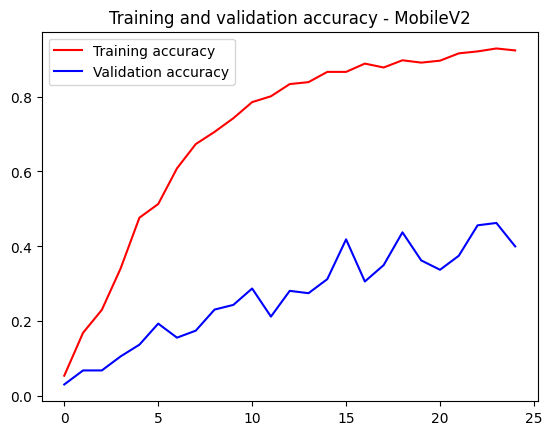

<Figure size 640x480 with 0 Axes>

Accuracy of the last epoch: 0.9284


In [ ]:
acc = mobileV2_history.history['accuracy']
val_acc = mobileV2_history.history['val_accuracy']
loss = mobileV2_history.history['loss']
val_loss = mobileV2_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - MobileV2')
plt.legend(loc=0)
plt.figure()

plt.show()

# Access the training history to print the accuracy of the last epoch
last_epoch_accuracy = inception_history.history['accuracy'][-1]
print(f'Accuracy of the last epoch: {last_epoch_accuracy:.4f}')

In [ ]:
from tensorflow.keras.applications import ResNet50

# Create the base model (ResNet50) without top (classification) layers
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Add custom top layers for your specific task
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(184, activation='softmax')(x)

# Create the final model
resnet_model = models.Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
resnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Set the number of epochs
epochs = 25

# Start the timer
start_time = time.time()

# Train the model using your data generators
resnet_history = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
# Print the training time
print(f"Training time: {elapsed_time} seconds")

Epoch 1/25
24/24 [==============================] - 47s 426ms/step - loss: 4.7874 - accuracy: 0.1003 - val_loss: 5.8634 - val_accuracy: 0.0000e+00
Epoch 2/25
24/24 [==============================] - 9s 379ms/step - loss: 3.6061 - accuracy: 0.3099 - val_loss: 5.2490 - val_accuracy: 0.0125
Epoch 3/25
24/24 [==============================] - 9s 379ms/step - loss: 2.7012 - accuracy: 0.4556 - val_loss: 5.3374 - val_accuracy: 0.0063
Epoch 4/25
24/24 [==============================] - 9s 384ms/step - loss: 1.9468 - accuracy: 0.5898 - val_loss: 5.3147 - val_accuracy: 0.0125
Epoch 5/25
24/24 [==============================] - 9s 382ms/step - loss: 1.4556 - accuracy: 0.6836 - val_loss: 5.3971 - val_accuracy: 0.0000e+00
Epoch 6/25
24/24 [==============================] - 9s 375ms/step - loss: 1.1352 - accuracy: 0.7305 - val_loss: 5.4602 - val_accuracy: 0.0063
Epoch 7/25
24/24 [==============================] - 9s 360ms/step - loss: 0.8848 - accuracy: 0.7799 - val_loss: 5.4049 - val_accuracy: 0.01

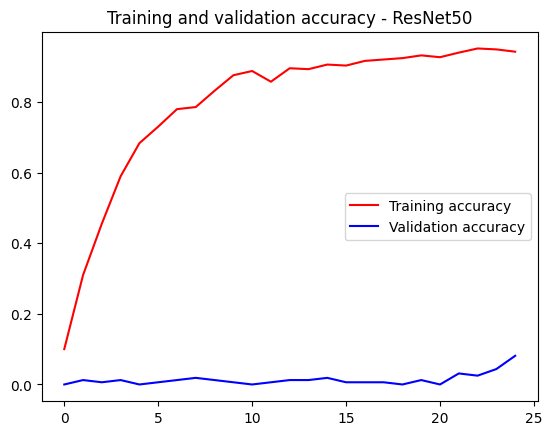

<Figure size 640x480 with 0 Axes>

Accuracy of the last epoch: 0.9427


In [ ]:
acc = resnet_history.history['accuracy']
val_acc = resnet_history.history['val_accuracy']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - ResNet50')
plt.legend(loc=0)
plt.figure()

plt.show()

# Access the training history to print the accuracy of the last epoch
last_epoch_accuracy = resnet_history.history['accuracy'][-1]
print(f'Accuracy of the last epoch: {last_epoch_accuracy:.4f}')

In [ ]:
from tensorflow.keras.applications import VGG16

# Create the base model (VGG16) without top (classification) layers
base_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Add custom top layers for your specific task
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_layer = layers.Dense(184, activation='softmax')(x)

# Create the final model
vgg_model = models.Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
vgg_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Set the number of epochs
epochs = 25

# Start the timer
start_time = time.time()

# Train the model using your data generators
vgg_history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
# Print the training time
print(f"Training time: {elapsed_time} seconds")

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/25
24/24 [==============================] - 39s 912ms/step - loss: 5.2397 - accuracy: 0.0065 - val_loss: 5.1187 - val_accuracy: 0.0375
Epoch 2/25
24/24 [==============================] - 10s 424ms/step - loss: 5.0684 - accuracy: 0.0312 - val_loss: 4.8278 - val_accuracy: 0.0250
Epoch 3/25
24/24 [==============================] - 11s 448ms/step - loss: 4.7696 - accuracy: 0.0898 - val_loss: 4.7074 - val_accuracy: 0.0875
Epoch 4/25
24/24 [==============================] - 10s 426ms/step - loss: 4.3840 - accuracy: 0.1133 - val_loss: 4.1770 - val_accuracy: 0.0938
Epoch 5/25
24/24 [==============================] - 11s 452ms/step - loss: 4.0774 - accuracy: 0.1341 - val_loss: 3.8244 - val_accuracy: 0.1437
Epoch 6/25
24/24 [==============================] - 10s 434ms/step - loss: 3.6382 - accuracy: 0.1849 - val_loss: 3.5758 - val_accuracy: 0.2125
Epoch 7/25
24/24 [==============================] - 11s 450ms/step - loss: 3.

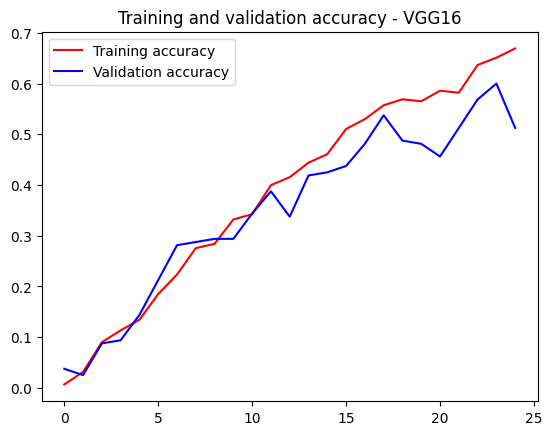

<Figure size 640x480 with 0 Axes>

Accuracy of the last epoch: 0.6693


In [ ]:
acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - VGG16')
plt.legend(loc=0)
plt.figure()

plt.show()

# Access the training history to print the accuracy of the last epoch
last_epoch_accuracy = vgg_history.history['accuracy'][-1]
print(f'Accuracy of the last epoch: {last_epoch_accuracy:.4f}')